In [6]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import random

# Часть 1

### Задание 1

In [12]:
bj = gym.make('Blackjack-v0')

In [13]:
n_steps=int(1e5)
rewards=[]
steps=[]

def action(cur_sum):
    if cur_sum<=18:
        return 1
    else:
        return 0

for i in range(n_steps):
    step=0
    cur_sum=bj.reset()[0]
    is_done=False 
    while not is_done:
       # _, sum, _ ,_ =
        obs,reward,is_done,_= bj.step(action(cur_sum))
        cur_sum=obs[0]
        step+=1
    rewards.append(reward)
    steps.append(step)
    
print("Средний выигрыш по оценке методом Монте-Карло: ", np.average(rewards))
print("Среднее число ходов за игру: ",np.average(steps))

Средний выигрыш по оценке методом Монте-Карло:  -0.1998
Среднее число ходов за игру:  1.74227


In [337]:
### Для natural blackjack:
bj.natural=True 

rewards=[]
steps=[]

for i in range(n_steps):
    step=0
    cur_sum=bj.reset()[0]
    is_done=False 
    while not is_done:
       # _, sum, _ ,_ =
        obs,reward,is_done,_= bj.step(action(cur_sum))
        cur_sum=obs[0]
        step+=1
    rewards.append(reward)
    steps.append(step)
    
print("(Natural) Средний выигрыш по оценке методом Монте-Карло: ", np.average(rewards))
print("(Natural) Среднее число ходов за игру: ",np.average(steps))

(Natural) Средний выигрыш по оценке методом Монте-Карло:  -0.17186
(Natural) Среднее число ходов за игру:  1.74972


### Задание 2,3

In [250]:
env = gym.make('Blackjack-v0')

In [157]:
nA = env.action_space.n
nS1 = env.observation_space.spaces[0].n
nS2=env.observation_space.spaces[1].n
nS3=env.observation_space.spaces[3].n
Q = np.zeros((nS1,nS2,nS3, nA))

In [22]:
# import numpy as np
import gym


env = gym.make("Blackjack-v0")
env.natural=True        
        
        
nA = env.action_space.n
nS1 = env.observation_space.spaces[0].n
nS2=env.observation_space.spaces[1].n
nS3=env.observation_space.spaces[2].n

    
def getAction(state,epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()     
    return np.argmax(Q[getStateIndex(state)],axis=0)

def getStateIndex(state):
    return (state[0],state[1],(int(state[2])))

alphas=[1e-6,1e-5,5e-5,1e-4,3e-4,1e-3]
gammas=[0.95,1]
epsilons=[0.3,0.5,0.9,0.95]
learning_episodes = 500000
play_episodes=100000

average_rewards=[]

for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            print("alpha:",alpha, " gamma:", gamma, " epsilon:", epsilon)
            
            rewards = []
            results = []
            Q = np.zeros((nS1,nS2,nS3, nA))
            for episode in range(learning_episodes): # блок обучения
                state = env.reset()
                is_done = False
                while not is_done:
                    #print (getStateIndex(state))
                    action=getAction(state,epsilon)
                    new_state, reward, is_done, info = env.step(action)
                    Q[getStateIndex(state)][action] = Q[getStateIndex(state)][action] + alpha * (reward + gamma * np.max(Q[getStateIndex(new_state)], axis=0) - Q[getStateIndex(state)][action])  
                    state = new_state
                    
            for episode in range(play_episodes): #блок проверки стратегии
                    state = env.reset()
                    t = 0
                    is_done = False
                    while not is_done:
                            
                        action = np.argmax(Q[getStateIndex(state)],axis=0)
                        new_state, reward, is_done, info = env.step(action)
                        state = new_state
                    results.append(reward)
                    
            average_reward = np.average(results)
            average_rewards.append([average_reward,alpha,gamma,epsilon])
            print(average_reward) 
                    

alpha: 1e-06  gamma: 0.95  epsilon: 0.3
-0.05281
alpha: 1e-06  gamma: 0.95  epsilon: 0.5
-0.040835
alpha: 1e-06  gamma: 0.95  epsilon: 0.9
-0.028065
alpha: 1e-06  gamma: 0.95  epsilon: 0.95
-0.027855
alpha: 1e-06  gamma: 1  epsilon: 0.3
-0.04816
alpha: 1e-06  gamma: 1  epsilon: 0.5
-0.058725
alpha: 1e-06  gamma: 1  epsilon: 0.9
-0.03129
alpha: 1e-06  gamma: 1  epsilon: 0.95
-0.02639
alpha: 1e-05  gamma: 0.95  epsilon: 0.3
-0.0524
alpha: 1e-05  gamma: 0.95  epsilon: 0.5
-0.046075
alpha: 1e-05  gamma: 0.95  epsilon: 0.9
-0.033255
alpha: 1e-05  gamma: 0.95  epsilon: 0.95
-0.037
alpha: 1e-05  gamma: 1  epsilon: 0.3
-0.04755
alpha: 1e-05  gamma: 1  epsilon: 0.5
-0.04736
alpha: 1e-05  gamma: 1  epsilon: 0.9
-0.024895
alpha: 1e-05  gamma: 1  epsilon: 0.95
-0.029415
alpha: 5e-05  gamma: 0.95  epsilon: 0.3
-0.057375
alpha: 5e-05  gamma: 0.95  epsilon: 0.5
-0.045175
alpha: 5e-05  gamma: 0.95  epsilon: 0.9
-0.03223
alpha: 5e-05  gamma: 0.95  epsilon: 0.95
-0.024615
alpha: 5e-05  gamma: 1  epsilon

# -0.023365
### для alpha: 5e-5  gamma: 1  epsilon: 0.9

#### построим график обучения

In [21]:
learn=500_000
play=100_000
mean_results=[]
Q = np.zeros((nS1,nS2,nS3, nA))

alpha=5e-5
gamma=1
epsilon=0.9


for local_episode in range(learn):
        results=[]
        state = env.reset()
        is_done = False
        while not is_done:
                    
            action=getAction(state,epsilon)
            new_state, reward, is_done, info = env.step(action)
            Q[getStateIndex(state)][action] = Q[getStateIndex(state)][action] + alpha * (reward + gamma * np.max(Q[getStateIndex(new_state)], axis=0) - Q[getStateIndex(state)][action])  
            state = new_state
        if (local_episode%10000==0):
            for _ in range(play):    
                state = env.reset()
                is_done = False
                while not is_done:

                    action = np.argmax(Q[getStateIndex(state)],axis=0)
                    new_state, reward, is_done, info = env.step(action)
                    state = new_state
                results.append(reward)

        mean_results.append(np.mean(results))

plt.figure(figsize=(16, 8))
plt.plot(range(learn), mean_results)
plt.xlabel('Число эпизодов')
plt.ylabel('Среняя награда')
plt.show()

IndexError: index 33 is out of bounds for axis 3 with size 3

# Часть 2

In [18]:

import gym
from gym import spaces
from gym.utils import seeding

def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv_double(gym.Env):
    """Simple blackjack environment

    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with dealer having one face up and one face down card, while
    player having two face up cards. (Virtually for all Blackjack games today).

    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).

    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.

    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.

    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).

    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.
    http://incompleteideas.net/book/the-book-2nd.html
    """
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action==1:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1.
            else:
                done = False
                reward = 0.
        if action==0:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1.:
                reward = 1.5
                
        if action==2:
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward=-2
            else:    
                while sum_hand(self.dealer) < 17:
                    self.dealer.append(draw_card(self.np_random))
                reward = 2*cmp(score(self.player), score(self.dealer))
                if self.natural and is_natural(self.player) and reward == 2.:
                    reward = 3
                done=True
                
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()
    

In [299]:
env=BlackjackEnv_double(natural=True)

nA = 3
nS = 32*11*2


alphas=[1e-5,5e-5,1e-4,3e-4,1e-3]
gammas=[0.95,1]
epsilons=[0.3,0.5,0.9,0.95]
learning_episodes = 300000
play_episodes=100000

average_rewards=[]

for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            print("alpha:",alpha, " gamma:", gamma, " epsilon:", epsilon)
            
            rewards = []
            results = []
            Q = np.zeros((nS1,nS2,nS3, nA))
            for episode in range(learning_episodes): # блок обучения
                state = env.reset()
                is_done = False
                while not is_done:
                    #print (getStateIndex(state))
                    action=getAction(state,epsilon)
                    new_state, reward, is_done, info = env.step(action)
                    Q[getStateIndex(state)][action] = Q[getStateIndex(state)][action] + alpha * (reward + gamma * np.max(Q[getStateIndex(new_state)], axis=0) - Q[getStateIndex(state)][action])  
                    state = new_state
                    
            for episode in range(play_episodes): #блок проверки стратегии
                    state = env.reset()
                    t = 0
                    is_done = False
                    while not is_done:
                            
                        action = np.argmax(Q[getStateIndex(state)],axis=0)
                        new_state, reward, is_done, info = env.step(action)
                        state = new_state
                    results.append(reward)
                    
            average_reward = np.average(results)
            average_rewards.append([average_reward,alpha,gamma,epsilon])
            print(average_reward) 

alpha: 1e-05  gamma: 0.95  epsilon: 0.3
-0.084055
alpha: 1e-05  gamma: 0.95  epsilon: 0.5
-0.053025
alpha: 1e-05  gamma: 0.95  epsilon: 0.9
-0.02069
alpha: 1e-05  gamma: 0.95  epsilon: 0.95
-0.01978
alpha: 1e-05  gamma: 1  epsilon: 0.3
-0.065355
alpha: 1e-05  gamma: 1  epsilon: 0.5
-0.055535
alpha: 1e-05  gamma: 1  epsilon: 0.9
-0.029715
alpha: 1e-05  gamma: 1  epsilon: 0.95
-0.020315
alpha: 5e-05  gamma: 0.95  epsilon: 0.3
-0.07251
alpha: 5e-05  gamma: 0.95  epsilon: 0.5
-0.052215
alpha: 5e-05  gamma: 0.95  epsilon: 0.9
-0.017665
alpha: 5e-05  gamma: 0.95  epsilon: 0.95
-0.012545
alpha: 5e-05  gamma: 1  epsilon: 0.3
-0.084765
alpha: 5e-05  gamma: 1  epsilon: 0.5
-0.062925
alpha: 5e-05  gamma: 1  epsilon: 0.9
-0.013965
alpha: 5e-05  gamma: 1  epsilon: 0.95
-0.01824
alpha: 0.0001  gamma: 0.95  epsilon: 0.3
-0.100695
alpha: 0.0001  gamma: 0.95  epsilon: 0.5
-0.0462
alpha: 0.0001  gamma: 0.95  epsilon: 0.9
-0.01721
alpha: 0.0001  gamma: 0.95  epsilon: 0.95
-0.013295
alpha: 0.0001  gamma: 

# -0.013965
####  для "alpha: 5e-05  gamma: 1  epsilon: 0.9"

#### построим график обучения 

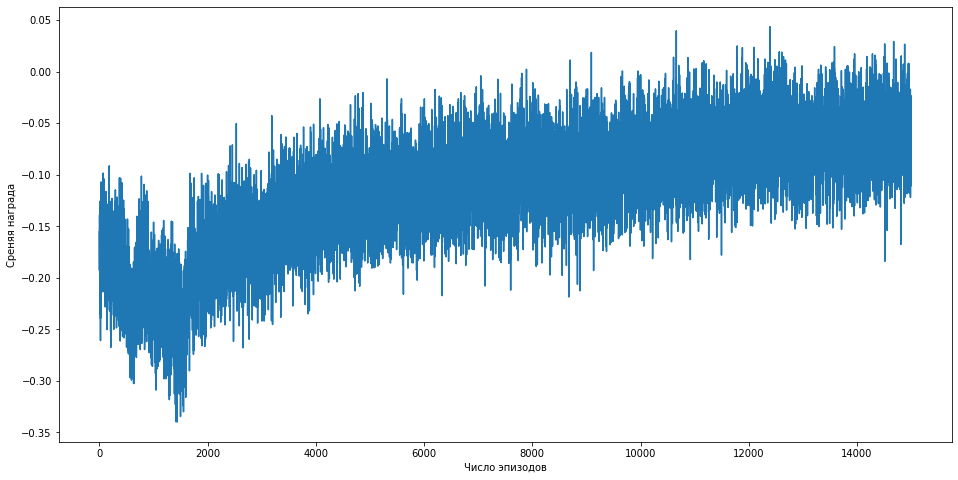

In [300]:
learn=15000
play=1500
mean_results=[]
Q = np.zeros((nS1,nS2,nS3,nA))

alpha=5e-5
gamma=1
epsilon=0.9


for local_episode in range(learn):
        results=[]
        state = env.reset()
        is_done = False
        while not is_done:
                    
            action=getAction(state,epsilon)
            new_state, reward, is_done, info = env.step(action)
            Q[getStateIndex(state)][action] = Q[getStateIndex(state)][action] + alpha * (reward + gamma * np.max(Q[getStateIndex(new_state)], axis=0) - Q[getStateIndex(state)][action])  
            state = new_state
            
        for _ in range(play):    
            state = env.reset()
            is_done = False
            while not is_done:
                            
                action = np.argmax(Q[getStateIndex(state)],axis=0)
                new_state, reward, is_done, info = env.step(action)
                state = new_state
            results.append(reward)
        
        mean_results.append(np.mean(results))

plt.figure(figsize=(16, 8))
plt.plot(range(learn), mean_results)
plt.xlabel('Число эпизодов')
plt.ylabel('Среняя награда')
plt.show()

# Часть 3

In [19]:
def getStateIndex(state):
    return (state[0],state[1],(int(state[2])),abs(state[3])*(np.sign(state[3])+2))

nA = 3
nS1 = 32
nS2 = 11
nS3 = 2
nS4 = 120

#####################



def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]*4

exitValues = { 1: -2, 2: 1, 3: 2, 4: 2, 5: 3, 6: 2, 7: 1, 8: 0, 9: -1, 10: -2}



def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21



def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv_count(gym.Env):
    """Simple blackjack environment

    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with dealer having one face up and one face down card, while
    player having two face up cards. (Virtually for all Blackjack games today).

    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).

    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.

    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.

    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).

    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.
    http://incompleteideas.net/book/the-book-2nd.html
    """
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2),
            spaces.Discrete(100)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        np.random.shuffle(deck)
        self.curDeck=list(deck)
        self.curCount=0
        self.reset()

        
    
    def drawCard(self,np_random):
        
        if len(self.curDeck)<15:
            np.random.shuffle(deck)
            self.curDeck=list(deck)
            self.curCount=0
        curCard = np_random.choice(self.curDeck)
        self.curDeck.remove(curCard)
        self.curCount+=exitValues[curCard]
        #print(self.curCount)
        return curCard

    def drawHand(self,np_random):
        return [self.drawCard(self.np_random), self.drawCard(self.np_random)]

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action==1:  # hit: add a card to players hand and return
            self.player.append(self.drawCard(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1.
            else:
                done = False
                reward = 0.
        if action==0:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(self.drawCard(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1.:
                reward = 1.5
                
        if action==2:
            self.player.append(self.drawCard(self.np_random))
            if is_bust(self.player):
                done = True
                reward=-2
            else:    
                while sum_hand(self.dealer) < 17:
                    self.dealer.append(self.drawCard(self.np_random))
                reward = 2*cmp(score(self.player), score(self.dealer))
                if self.natural and is_natural(self.player) and reward == 2.:
                    reward = 3
                done=True
                
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        #print(self.curCount)
        
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player), self.curCount)

    def reset(self):
        self.dealer = self.drawHand(self.np_random)
        self.player = self.drawHand(self.np_random)
        return self._get_obs()
    

In [20]:
env=BlackjackEnv_count(natural=True)

alphas=[1e-7,1e-6,1e-5,5e-5]
gammas=[0.9,0.1]
epsilons=[0.9,0.95]
learning_episodes = 5_000_000
play_episodes=250_000


average_rewards=[]

for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            print("alpha:",alpha, " gamma:", gamma, " epsilon:", epsilon)
            
            rewards = []
            results = []
            Q = np.zeros((nS1,nS2,nS3,nS4, nA))
            for episode in range(learning_episodes): # блок обучения
                state = env.reset()
                is_done = False
                while not is_done:
                    #print (getStateIndex(state))
                    action=getAction(state,epsilon)
                    new_state, reward, is_done, info = env.step(action)
                    Q[getStateIndex(state)][action] = Q[getStateIndex(state)][action] + alpha * (reward + gamma * np.max(Q[getStateIndex(new_state)], axis=0) - Q[getStateIndex(state)][action])  
                    state = new_state
                    
            for episode in range(play_episodes): #блок проверки стратегии
                    state = env.reset()
                    t = 0
                    is_done = False
                    while not is_done:
                            
                        action = np.argmax(Q[getStateIndex(state)],axis=0)
                        new_state, reward, is_done, info = env.step(action)
                        state = new_state
                    results.append(reward)
                    
            average_reward = np.average(results)
            average_rewards.append([average_reward,alpha,gamma,epsilon])
            print(average_reward) 

alpha: 1e-07  gamma: 0.9  epsilon: 0.9


KeyboardInterrupt: 

### лучший результат: -0.01613
### обойти предыдущий вариант без подсчета, к сожалению, не удалось. возможно, из-за бОльшего числа состояний, которые не удалось статистически "покрыть" за время обучения

In [ ]:
env=BlackjackEnv_count(natural=True)
learn=1_000_000
play=100_000
mean_results=[]
Q = np.zeros((nS1,nS2,nS3,nS4,nA))

alpha=1e-7
gamma=0.9
epsilon=0.95


for local_episode in range(learn):
        results=[]
        state = env.reset()
        is_done = False
        while not is_done:
                    
            action=getAction(state,epsilon)
            new_state, reward, is_done, info = env.step(action)
            Q[getStateIndex(state)][action] = Q[getStateIndex(state)][action] + alpha * (reward + gamma * np.max(Q[getStateIndex(new_state)], axis=0) - Q[getStateIndex(state)][action])  
            state = new_state
        if (local_episode%25000==0):    
            for _ in range(play):    
                state = env.reset()
                is_done = False
                while not is_done:

                    action = np.argmax(Q[getStateIndex(state)],axis=0)
                    new_state, reward, is_done, info = env.step(action)
                    state = new_state
                results.append(reward)
        

            mean_results.append(np.mean(results))



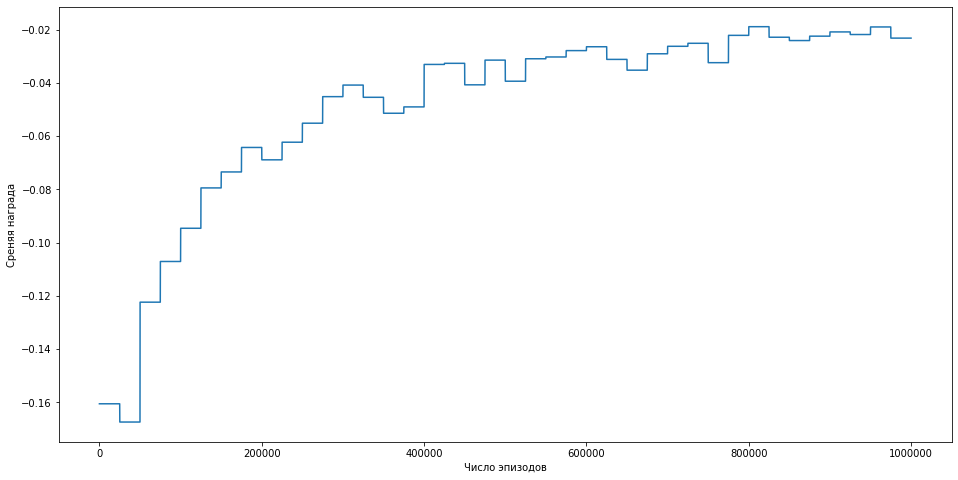

In [66]:
lst=[];t=0
for i in range(learn):
    if (i%25000==0):
        lst.append(mean_results[int(i/25000)])
        t+=1
    else:
        lst.append(mean_results[t-1])
        
plt.figure(figsize=(16, 8))
plt.plot(range(learn), lst)
plt.xlabel('Число эпизодов')
plt.ylabel('Среняя награда')
plt.show()